### 2um 2.5cp experiment

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from trackpy_package import Experiment

In [2]:
cwd = os.getcwd() # Get path to directory that this notebook is being run in
experiment_path = os.path.join(cwd, '2um_25') # Create path to experiment folder, which contains trial folders
dat = Experiment(experiment_dir_path=experiment_path, microns_per_pixel=0.4065)

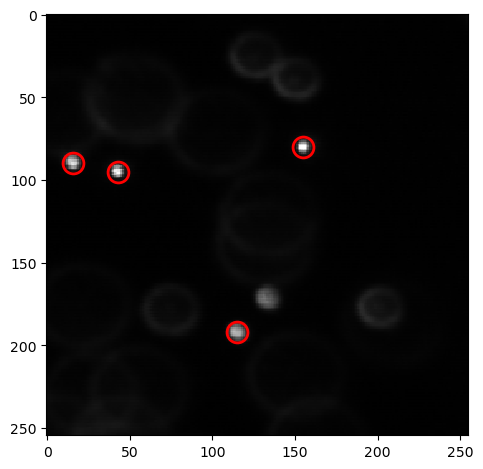

In [3]:
fig, ax = plt.subplots(layout='tight')
ax = dat.locate(
    trial_name='2um_1',
    frame_num=1,
    diameter=13,
    minmass=2900,
    separation=20
)

# fig.savefig('good.png')

Setting all trials to same parameters for now

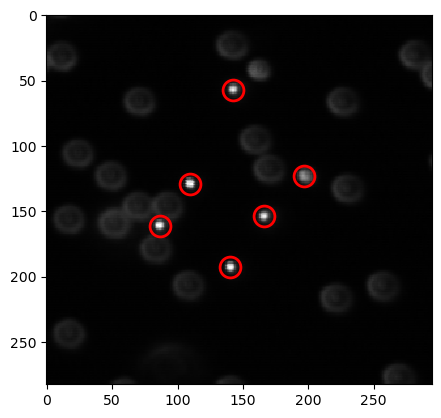

2um_5


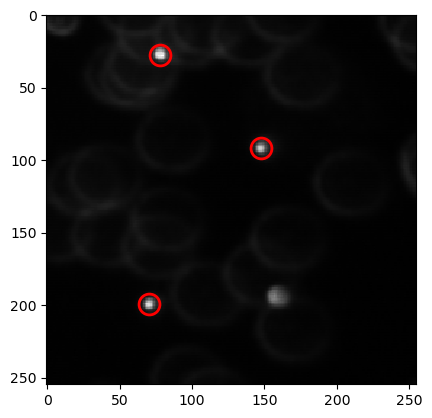

2um_2


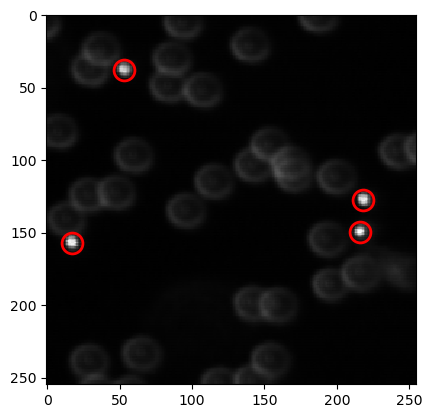

2um_3


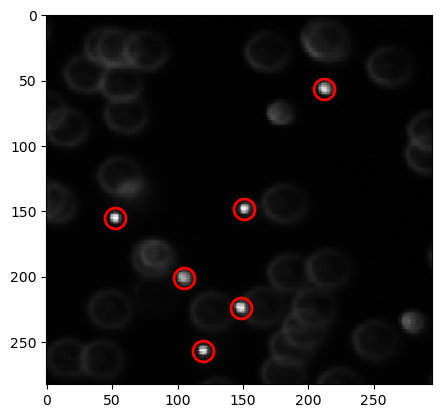

2um_4


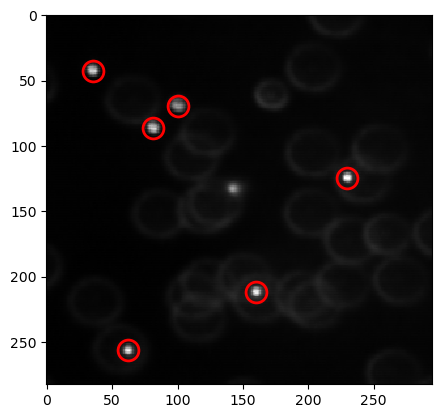

2um_8


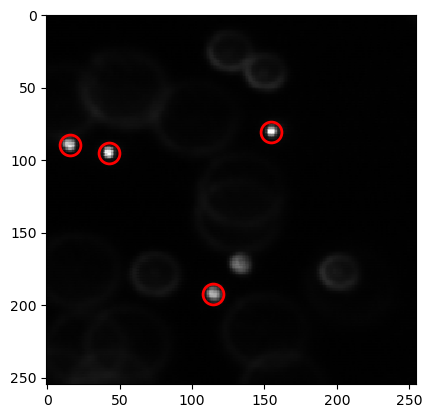

2um_1


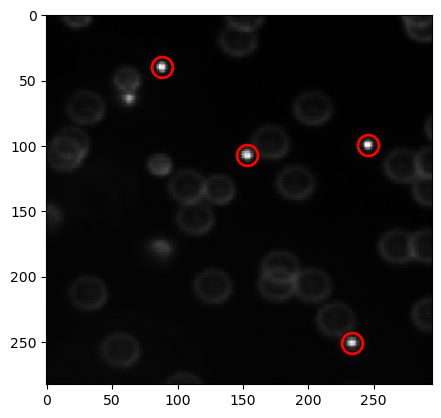

2um_6


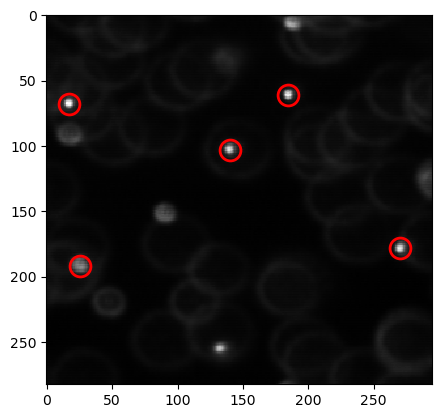

2um_7


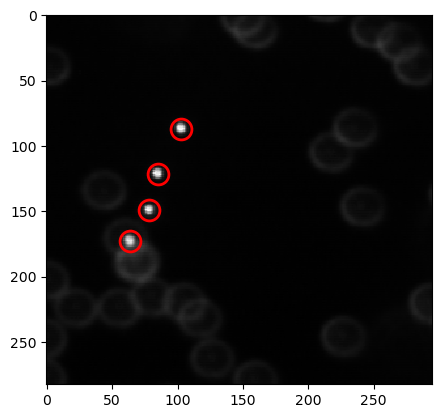

2um_9


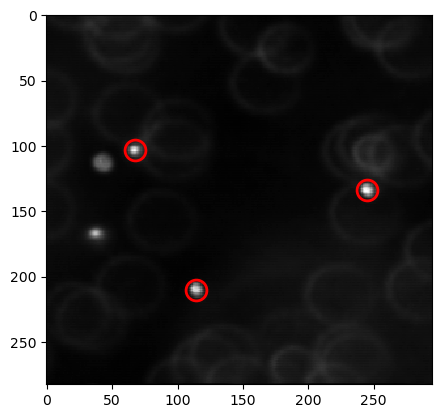

2um_10


In [4]:
for tname in dat.trials.keys():
    dat.locate(
        trial_name=tname,
        frame_num=1,
        diameter=13,
        minmass=2800,
        separation=20
    )
    print(tname)

Once all `diameter` and `minmass` are filled for each trial, call `batch_all()` to call batch on all trials.

In [5]:
dat.batch_all()

Frame 37: 3 features
Success!


Then call `link_all()` to track particle trajectories for each trial

In [6]:
dat.link_all()

Frame 37: 3 trajectories present.
Success!


We can plot the trajectory for a trial using `plot_traj()`

Looks reasonable. We can also plot trajectories for all trials

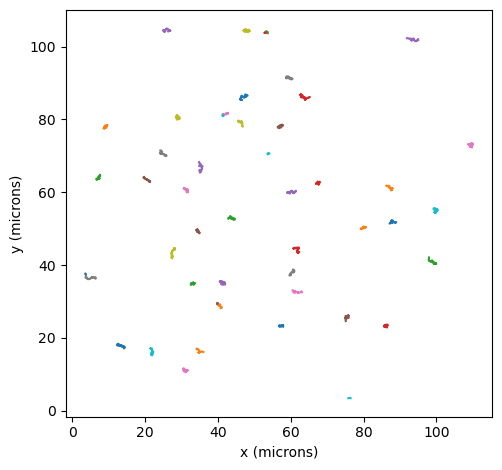

In [7]:
ax = dat.plot_traj_all()
fig = ax.get_figure()
fig.set_tight_layout(True)
ax.set_xlabel('x (microns)')
ax.set_ylabel('y (microns)')
ax.set_aspect('equal')

# fig.savefig('trajectories.png')

Get diffusion coefficient of each particle in a trial using below function

In [8]:
coeff, err = dat.get_diffusion_coefficient_experiment()

Particle 5 nan coeff
Particle 5 nan coeff
Particle 6 nan coeff
Particle 8 nan coeff


In [9]:
a = f"{coeff:0.3e}"[:-4]
ex = f"{coeff:0.3e}"[-3:]
aerr = f"{err:0.3e}"[:-4]
exerr = f"{err:0.3e}"[-3:]

print(f"${a}\\times10^{{{ex}}}\\pm{aerr}\\times10^{{{exerr}}}$")

$5.050\times10^{-14}\pm2.251\times10^{-29}$
